# Computergraphik: Flächen

### Bibliotheken

In [108]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pl
import ipywidgets as iw

## 3D-Plots

### Funktion definieren

$\begin{align*}
    f: [-3, 3] \times [-2, 2] 
        & \;\longrightarrow\; \mathbb{R}^2 \\
    (x, y)
        & \;\longmapsto\; -\frac14 \, (x^2 + y^2)
\end{align*}$

### Punkte in x-Richtung

In [109]:
x = np.linspace (-3, 3, 7)

In [110]:
print (x)

[-3. -2. -1.  0.  1.  2.  3.]


### Punkte in y-Richtung

In [111]:
y = np.linspace (-2, 2, 5)

In [112]:
print (y)

[-2. -1.  0.  1.  2.]


### Urbild
Gitter im Definitionsbereich

In [113]:
xx, yy = np.meshgrid (x, y)

In [114]:
print (xx)

[[-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]]


In [115]:
print (yy)

[[-2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.]]


### Bild
Funktionswerte im Wertebereich

In [116]:
zz = - (xx ** 2 + yy ** 2) / 4

In [117]:
print (zz)

[[-3.25 -2.   -1.25 -1.   -1.25 -2.   -3.25]
 [-2.5  -1.25 -0.5  -0.25 -0.5  -1.25 -2.5 ]
 [-2.25 -1.   -0.25 -0.   -0.25 -1.   -2.25]
 [-2.5  -1.25 -0.5  -0.25 -0.5  -1.25 -2.5 ]
 [-3.25 -2.   -1.25 -1.   -1.25 -2.   -3.25]]


### Schattierte Darstellung
(Shaded Plot)

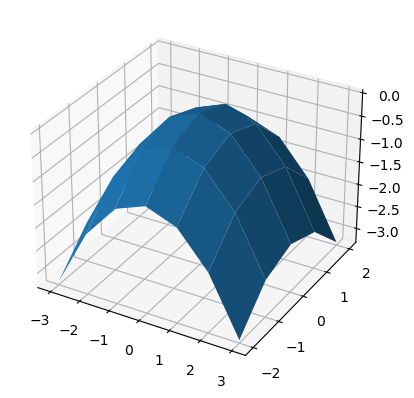

In [118]:
ax = pl.subplot (projection = '3d')
ax.plot_surface (xx, yy, zz)

### Drahtgitter-Darstellung
(Wireframe Plot)

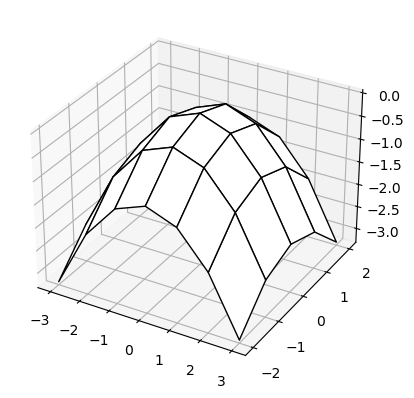

In [119]:
ax = pl.subplot (projection = '3d')
ax.plot_surface (xx, yy, zz, shade = False, rstride = 1, cstride = 1, color = 'white', edgecolor = 'black')

### Verzerrungsfreie Darstellung
gleicher Massstab für alle Achsen

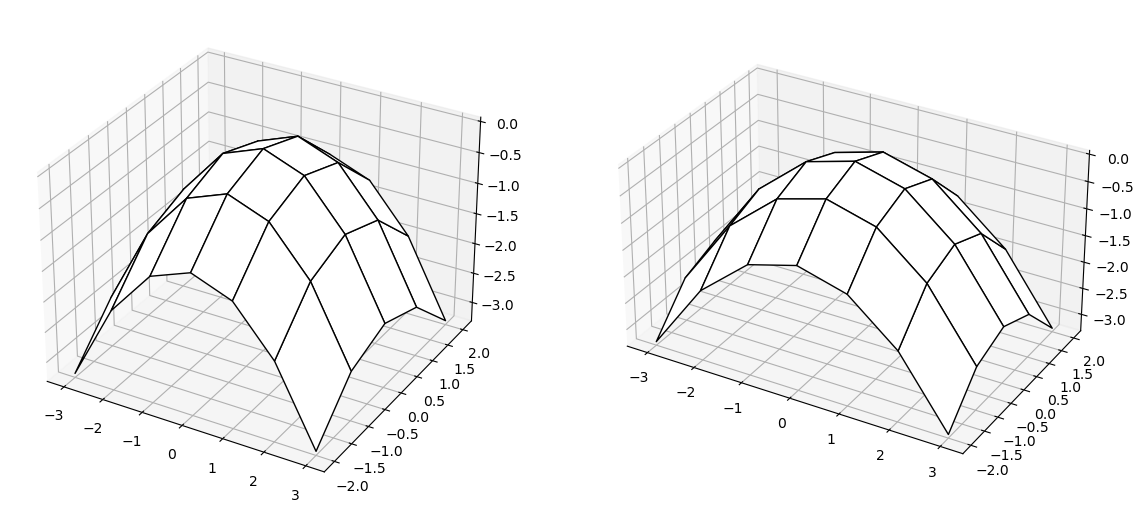

In [120]:
pl.figure (figsize = (14, 7))

ax = pl.subplot (1, 2, 1, projection = '3d')
ax.plot_surface (xx, yy, zz, shade = False, rstride = 1, cstride = 1, color = 'white', edgecolor = 'black')

ax = pl.subplot (1, 2, 2, projection = '3d')
ax.plot_surface (xx, yy, zz, shade = False, rstride = 1, cstride = 1, color = 'white', edgecolor = 'black')
ax.set_box_aspect ((np.ptp (xx), np.ptp (yy), np.ptp (zz)))

### Geänderte Perspektive

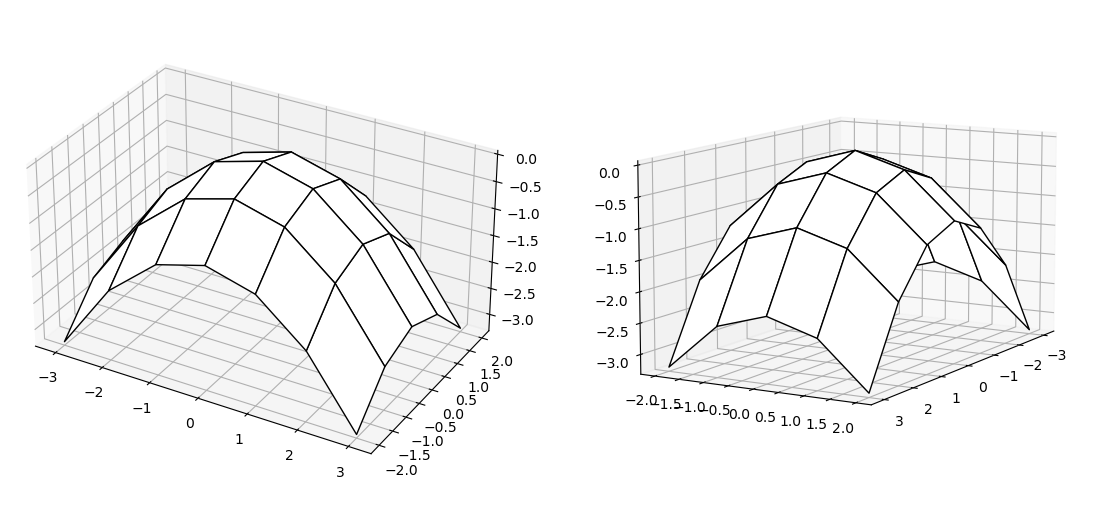

In [121]:
pl.figure (figsize = (14, 7))

ax = pl.subplot (1, 2, 1, projection = '3d')
ax.plot_surface (xx, yy, zz, shade = False, rstride = 1, cstride = 1, color = 'white', edgecolor = 'black')
ax.set_box_aspect ((np.ptp (xx), np.ptp (yy), np.ptp (zz)))

ax = pl.subplot (1, 2, 2, projection = '3d')
ax.plot_surface (xx, yy, zz, shade = False, rstride = 1, cstride = 1, color = 'white', edgecolor = 'black')
ax.set_box_aspect ((np.ptp (xx), np.ptp (yy), np.ptp (zz)))
ax.view_init (elev = 10, azim = 30)

## Definition nützlicher Funktionen

In [122]:
def MeshGrid (xmin, xmax, xmeshes, ymin, ymax, ymeshes): # von 2D nach 3D
    x = np.linspace (xmin, xmax, xmeshes + 1)
    y = np.linspace (ymin, ymax, ymeshes + 1)
    return np.meshgrid (x, y)

In [123]:
def SubPlot (rows, cols, pos, xx, yy, zz):
    ax = pl.subplot (rows, cols, pos, projection = '3d')
    ax.set_box_aspect ((np.ptp (xx), np.ptp (yy), np.ptp (zz)))
    return ax

In [124]:
def PlotWireframe (ax, xx, yy, zz):
    ax.plot_surface (xx, yy, zz, shade = False, rstride = 1, cstride = 1, color = 'whitesmoke', edgecolor = 'black')

In [125]:
def PlotShaded (ax, xx, yy, zz):
    ax.plot_surface (xx, yy, zz, color = 'lightblue', antialiased = False)

In [126]:
def Plot (xx, yy, zz):        
    pl.figure (figsize = (14, 7))
    ax = SubPlot (1, 2, 1, xx, yy, zz); 
    PlotWireframe (ax, xx, yy, zz);
    ax = SubPlot (1, 2, 2, xx, yy, zz); 
    PlotShaded (ax, xx, yy, zz);

## Folie 4

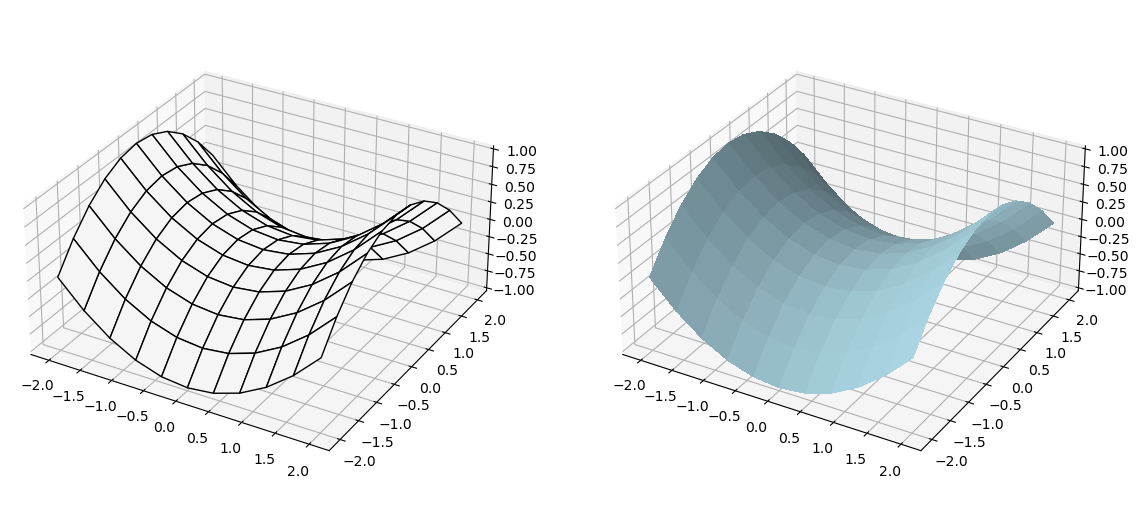

In [127]:
def Slide_04 ():
    
    def f (xx, yy):
        return (xx ** 2 - yy ** 2) / 4.0
    
    xx, yy = MeshGrid (-2.0, 2.0, 10, -2.0, 2.0, 10)
    Plot (xx, yy, f (xx, yy))
    
Slide_04()

## Folie 5

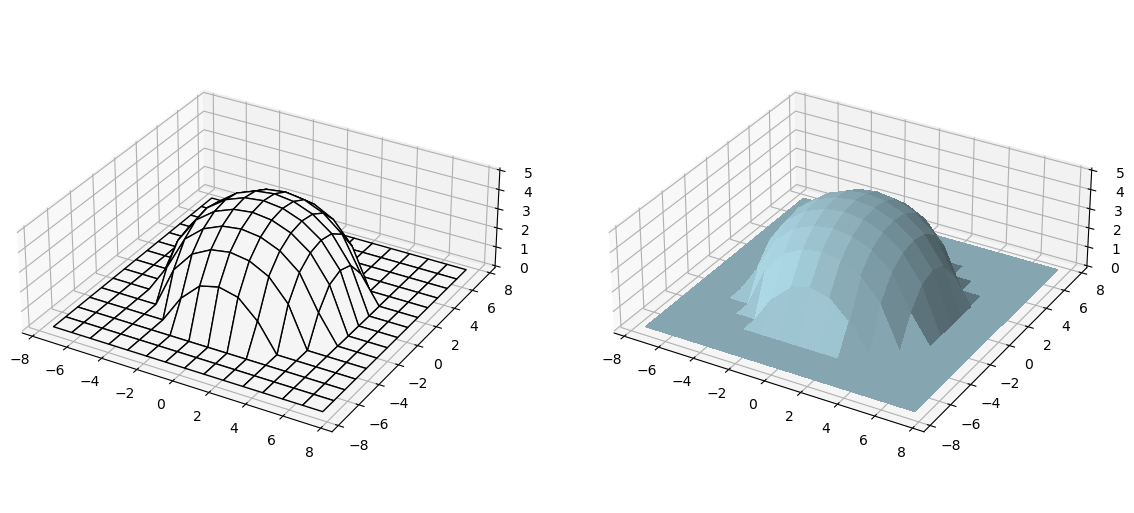

In [128]:
def Slide_05 ():
    
    r = 5.0
    
    def f (x, y):
        u = r ** 2 - x ** 2 - y ** 2
        return np.sqrt (u) if u > 0 else 0.0 # check if produkt grösse als 0 ist, da wurzel gezogen wird
    
    def g (xx, yy):
        zz = np.zeros_like (xx)
        for i in range (xx.shape [0]):
            for k in range (xx.shape [1]):
                zz [i, k] = f (xx [i, k], yy [i, k])
        return zz
    
    xx, yy = MeshGrid (- 1.5 * r, 1.5 * r, 14, - 1.5 * r, 1.5 * r, 14)
    Plot (xx, yy, g (xx, yy))
    
Slide_05()

## Folie 7

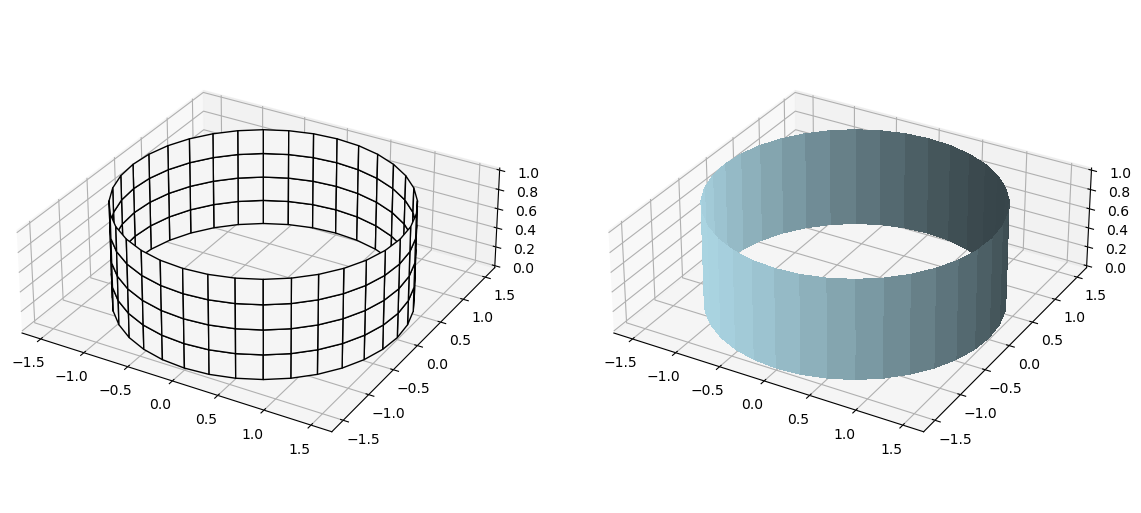

In [129]:
def Slide_07 ():
    
    r = 1.5
    
    def f (uu, vv):
        xx = r * np.cos (uu)
        yy = r * np.sin (uu)
        zz = vv
        return xx, yy, zz
    
    uu, vv = MeshGrid (0.0, 2 * np.pi, 36, 0.0, 1.0, 4)
    xx, yy, zz = f (uu, vv)
    Plot (xx, yy, zz)
    
Slide_07()

## Folie 9

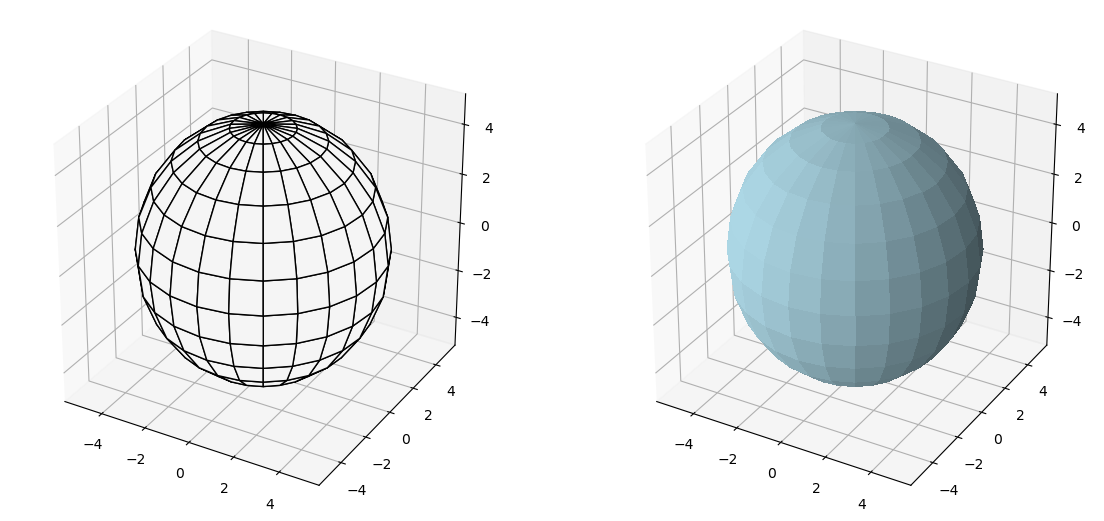

In [130]:
def Slide_09 ():
    
    r = 5.0
    # input in Kugelkoordinaten
    def f (uu, vv):
        u = np.pi * uu; cu = np.cos (u); su = np.sin (u)
        v = np.pi * vv; cv = np.cos (v); sv = np.sin (v)
        xx = r * su * cv
        yy = r * su * sv
        zz = r * cu
        return xx, yy, zz
    
    uu, vv = MeshGrid (0.0, 1.0, 12, 0.0, 2.0, 24)
    xx, yy, zz = f (uu, vv)
    Plot (xx, yy, zz)
    
Slide_09()

## Folie 10

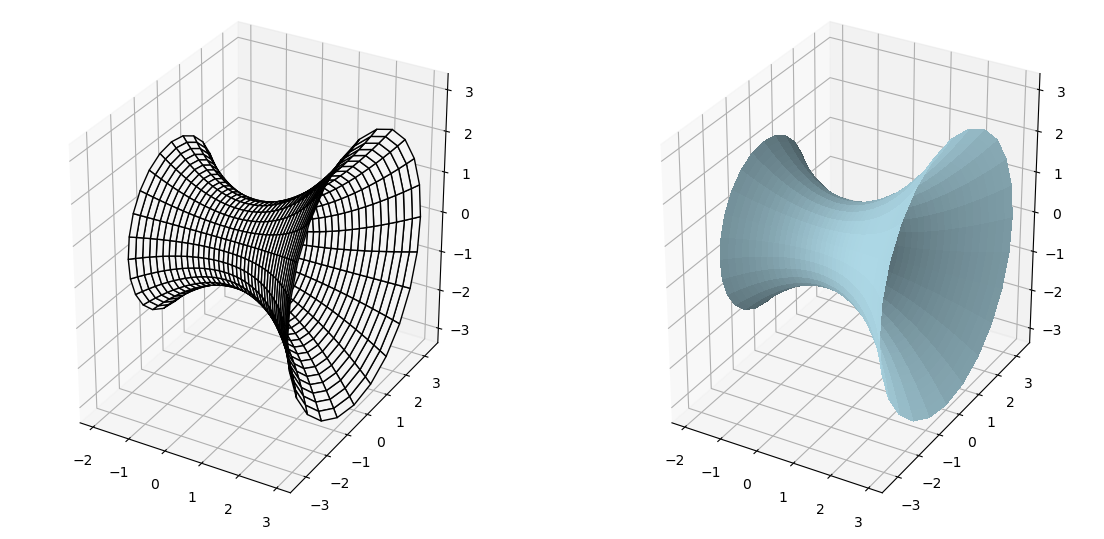

In [131]:
def Slide_10 ():
    
    def f (u):
        return 1.0 + u ** 2 / 4.0
    
    def g (uu, vv):
        ff = f (uu)
        xx = uu
        yy = ff * np.cos (vv)
        zz = ff * np.sin (-vv)
        return xx, yy, zz
    
    uu, vv = MeshGrid (-2.0, 3.0, 40, 0.0, 2.0 * np.pi, 24)
    xx, yy, zz = g (uu, vv)
    Plot (xx, yy, zz)
    
Slide_10()

## Folie 11

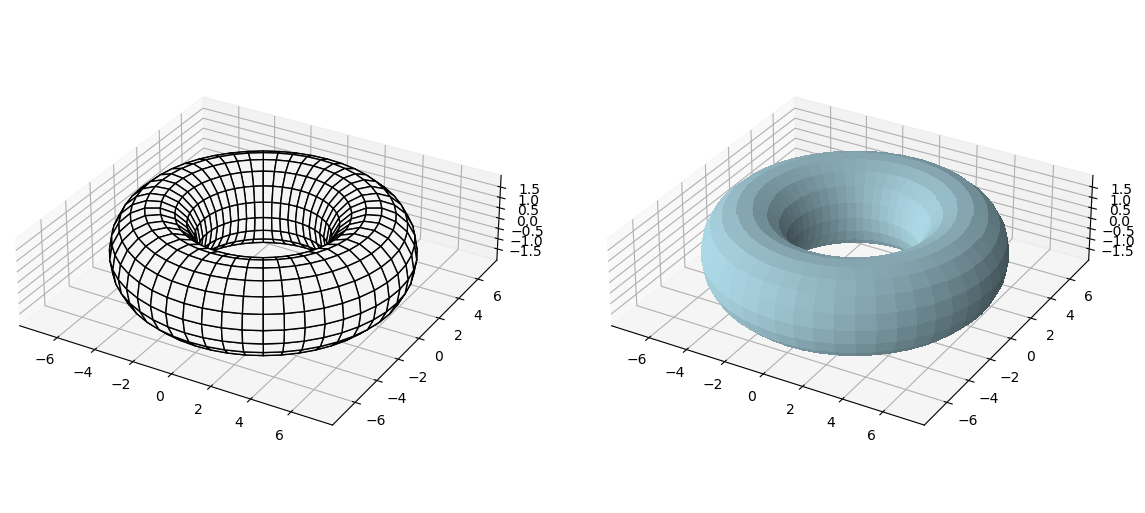

In [132]:
def Slide_11 ():
    
    r1 = 5
    r2 = 2
    
    def f (uu, vv): # paramter sind winkel
        rr = r1 + r2 * np.cos (vv)
        xx = rr * np.cos (uu)
        yy = rr * np.sin (uu)
        zz = r2 * np.sin (vv)
        return xx, yy, zz
    
    uu, vv = MeshGrid (0.0, 2.0 * np.pi, 48, 0.0, 2.0 * np.pi, 18)
    xx, yy, zz = f (uu, vv)
    Plot (xx, yy, zz)
    
Slide_11()

## Folie 12

### Geschlossene Darstellung

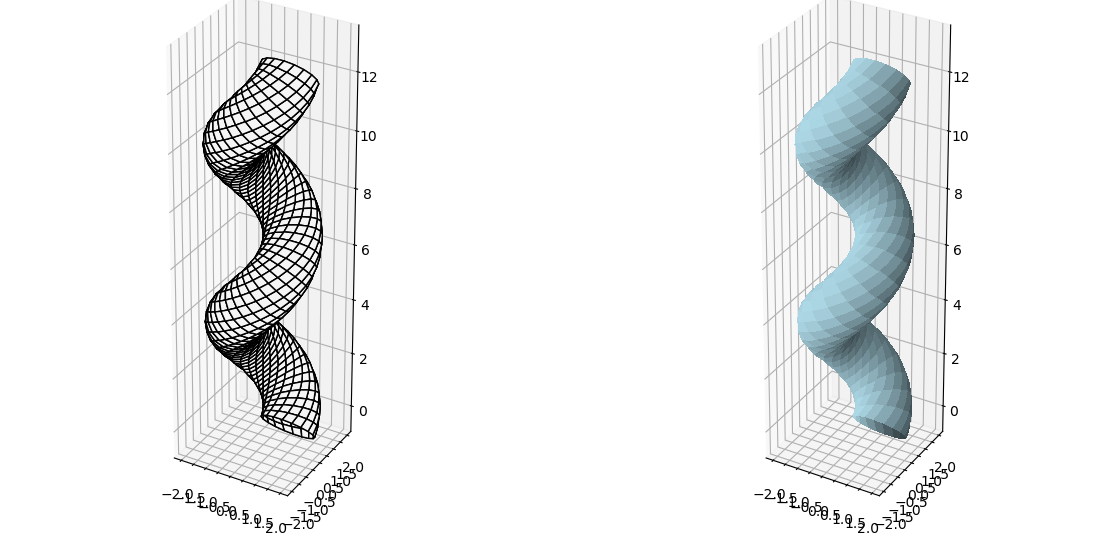

In [133]:
def Slide_12a ():

    def curve (tt):
        return np.array ([np.cos (tt), np.sin (tt), tt])

    def normal (tt):
        return np.array ([- np.cos (tt), - np.sin (tt), np.zeros_like (tt)])

    def binormal (tt):
        return np.array ([np.sin (tt), - np.cos (tt), np.ones_like (tt)]) / np.sqrt (2)

    def f (uu, vv):
        cc = curve (vv)
        cu = np.cos (uu); nn = normal (vv)
        su = np.sin (uu); bb = binormal (vv)
        return np.array ([
            cc [0] + cu * nn [0] + su * bb [0],
            cc [1] + cu * nn [1] + su * bb [1],
            cc [2] + cu * nn [2] + su * bb [2]
        ])

    uu, vv = MeshGrid (0.0, 4.0 * np.pi, 36, 0.0, 4.0 * np.pi, 72)
    xx, yy, zz = f (uu, vv)
    Plot (xx, yy, zz)

Slide_12a()

### Numerische Berechnung

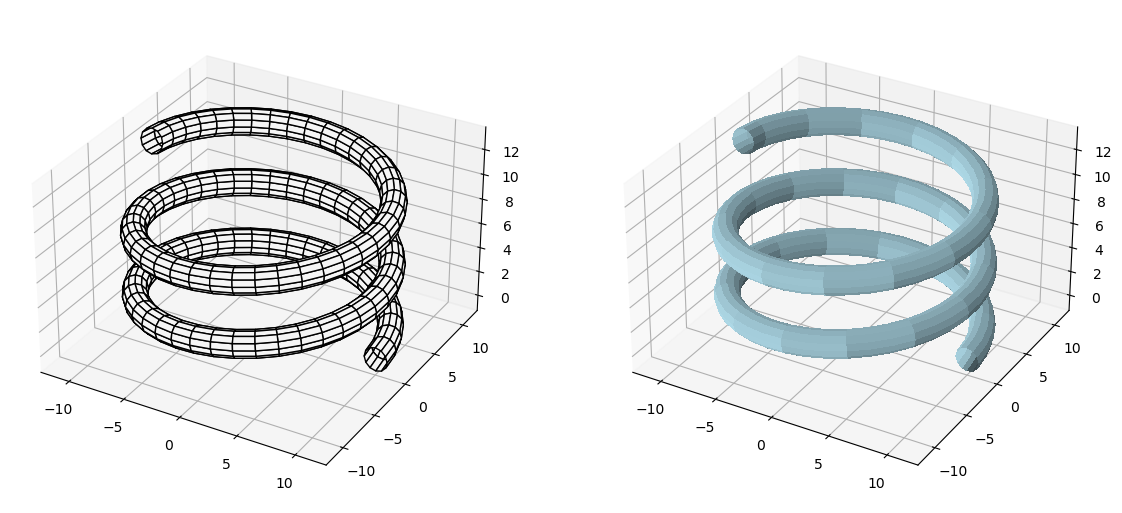

In [134]:
def Slide_12b ():

    r1 = 10.0
    r2 = 1.0
    h = 5.0

    def curve (t):
        phi = 2.0 * np.pi * t
        return np.array ([[r1 * np.cos (phi)], [r1 * np.sin (phi)], [t * h]])

    def tangent (t):
        h = 1E-8
        v = (curve (t + h) - curve (t)) / h
        return v / la.norm (v)

    def normal (t):
        h = 1E-5
        a = (curve (t + h) -  2 * curve (t) + curve (t - h)) / h ** 2
        return a / la.norm (a)

    def binormal (t):
        return np.cross (tangent (t) .T, normal (t) .T) .T

    def f (u, v):
        phi = 2.0 * np.pi * u
        return curve (v) + r2 * np.cos (phi) * normal (v) + r2 * np.sin (phi) * binormal (v)

    def g (uu, vv):
        m, n = uu.shape
        pp = np.zeros ((3, m, n))
        for i in range (m):
            for k in range (n):
                p = f (uu [i, k], vv [i, k])
                pp [0, i, k] = p [0]
                pp [1, i, k] = p [1]
                pp [2, i, k] = p [2]
        return pp;

    uu, vv = MeshGrid (0.0, 1.0, 12, 0.0, 2.5, 100)
    xx, yy, zz = g (uu, vv)
    Plot (xx, yy, zz)

Slide_12b()

## Folie 13

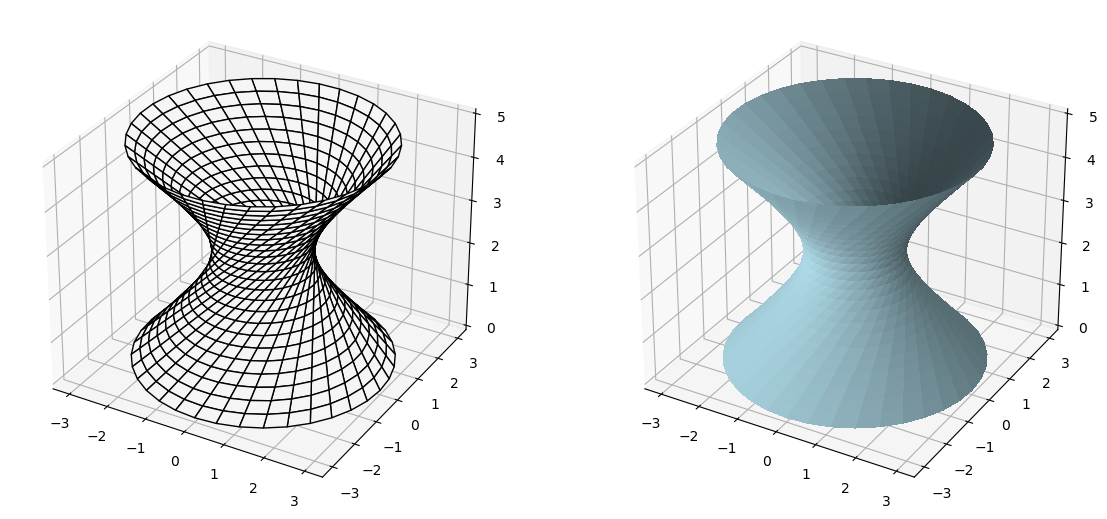

In [135]:
def Slide_13 ():
    
    r = 3
    h = 5
    phi = 135
    
    def f (uu, vv):
        u0 = 2 * np.pi * uu
        u1 = 2 * np.pi * (uu + phi / 360) # drehung des kreises
        ww = 1 - vv
        xx = r * (ww * np.cos (u0) + vv * np.cos (u1))
        yy = r * (ww * np.sin (u0) + vv * np.sin (u1))
        zz = h * vv
        return xx, yy, zz
    
    uu, vv = MeshGrid (0.0, 1.0, 36, 0.0, 1.0, 25)
    xx, yy, zz = f (uu, vv)
    Plot (xx, yy, zz)
        
Slide_13()

## Folie 14

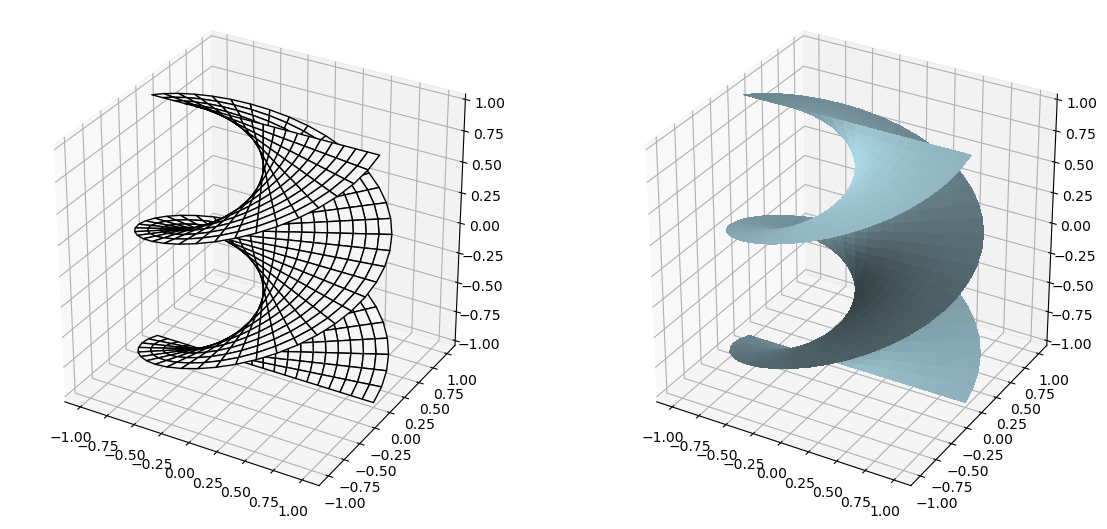

In [136]:
def Slide_14 ():
    
    def f (phi, t):
        xx = t * np.cos (phi)
        yy = t * np.sin (phi)
        zz = phi / np.pi
        return xx, yy, zz
    
    uu, vv = MeshGrid (-np.pi, np.pi, 40, -1.0, 1.0, 20)
    xx, yy, zz = f (uu, vv)
    Plot (xx, yy, zz)
    
Slide_14()

## Folie 18

In [137]:
P = np.array ([
    [0, 3, 6, 9,   0, 3, 6, 9,   0, 3, 6, 9,   0, 3, 6, 9],
    [0, 0, 0, 0,   3, 3, 3, 3,   6, 6, 6, 6,   9, 9, 9, 9],
    [0, 2, 3, 0,   3, 5, 6, 4,   3, 5, 6, 6,   0, 3, 5, 5]
]) .reshape (3, 4, 4, order = 'F')

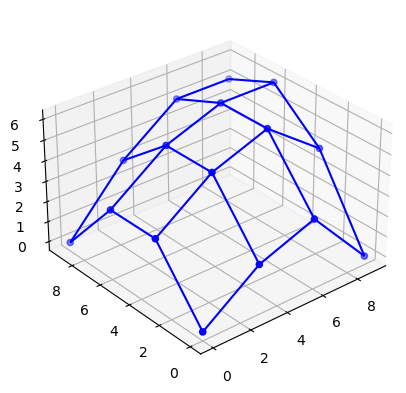

In [138]:
ax = pl.subplot (projection = '3d', azim = -130, elev = 30)
ax.plot_wireframe (P [0], P [1], P [2], edgecolor = 'blue')
ax.scatter (P [0], P [1], P [2], 'o', color = 'blue')
ax.set_box_aspect ((np.ptp (P [0]), np.ptp (P [1]), np.ptp (P [2])))

In [139]:
def DeCasteljau0 (p, t):
    n = p.shape [1]
    if n <= 1:
        return p [:, 0]
    q = (1 - t) * p [:, :-1] + t * p [:, 1:]
    return DeCasteljau0 (q, t)

def DeCasteljau (p, tt):
    pp = np.array ([DeCasteljau0 (p, t) for t in tt])
    return pp.T

In [140]:
def Callback (curves, t, azi, ele):

    ax = pl.subplot (projection = '3d')
    ax.view_init (azim = -azi, elev = ele)
    
    def PlotPoints (p, c):
        ax.plot (p [0], p [1], p [2], 'o', color = c)

    def PlotLine (p, c):
        ax.plot (p [0], p [1], p [2], color = c)
        
    def PlotPolygon (p, c):
        PlotPoints (p, c)
        PlotLine (p, c)

    tt = np.linspace (0, 1, 100)
    
    if curves == 1:
        C0 = P [:, 0:4, 0]; C1 = P [:, 0:4, 1]; C2 = P [:, 0:4, 2]; C3 = P [:, 0:4, 3]
    else:
        C0 = P [:, 0, 0:4]; C1 = P [:, 1, 0:4]; C2 = P [:, 2, 0:4]; C3 = P [:, 3, 0:4]

    PlotPolygon (C0, 'blue'); 
    PlotLine (DeCasteljau (C0, tt), 'blue')
    PlotLine (DeCasteljau (C1, tt), 'blue')
    PlotLine (DeCasteljau (C2, tt), 'blue')
    PlotLine (DeCasteljau (C3, tt), 'blue')

    P0 = DeCasteljau (C0, [t])
    P1 = DeCasteljau (C1, [t])
    P2 = DeCasteljau (C2, [t])
    P3 = DeCasteljau (C3, [t])

    C = np.concatenate ((P0, P1, P2, P3), axis = 1);
    PlotPolygon (C, 'magenta')
    PlotLine (DeCasteljau (C, tt), 'red')

In [141]:
SwitchCurves = iw.Dropdown (options = [1, 2], value = 1, description = 'Curves', disabled = False)
SliderT = iw.FloatSlider (min = 0, max = 1, step = 0.01, value = 0.5, description = 't')
SliderAzim = iw.IntSlider (min = -180, max = 180, step = 1, value = -130, description = 'Azimut')
SliderElev = iw.IntSlider (min = 0, max = 90, step = 1, value = 30, description = 'Elevation')
UserInterface = iw.HBox ([SwitchCurves, SliderT, SliderAzim, SliderElev])
Output = iw.interactive_output (Callback, {'curves': SwitchCurves, 'azi': SliderAzim, 'ele': SliderElev, 't': SliderT})
display (UserInterface, Output)

Output()

In [142]:
def Bernstein (n, k):
    j = np.arange (1, n - k + 1)
    f = 1 + k / j
    return np.prod (f)

In [143]:
def Bezier (n, k, tt):
    f1 = Bernstein (n, k)
    f2 = np.power (1 - tt, n - k);
    f3 = np.power (tt, k)
    return f1 * f2 * f3

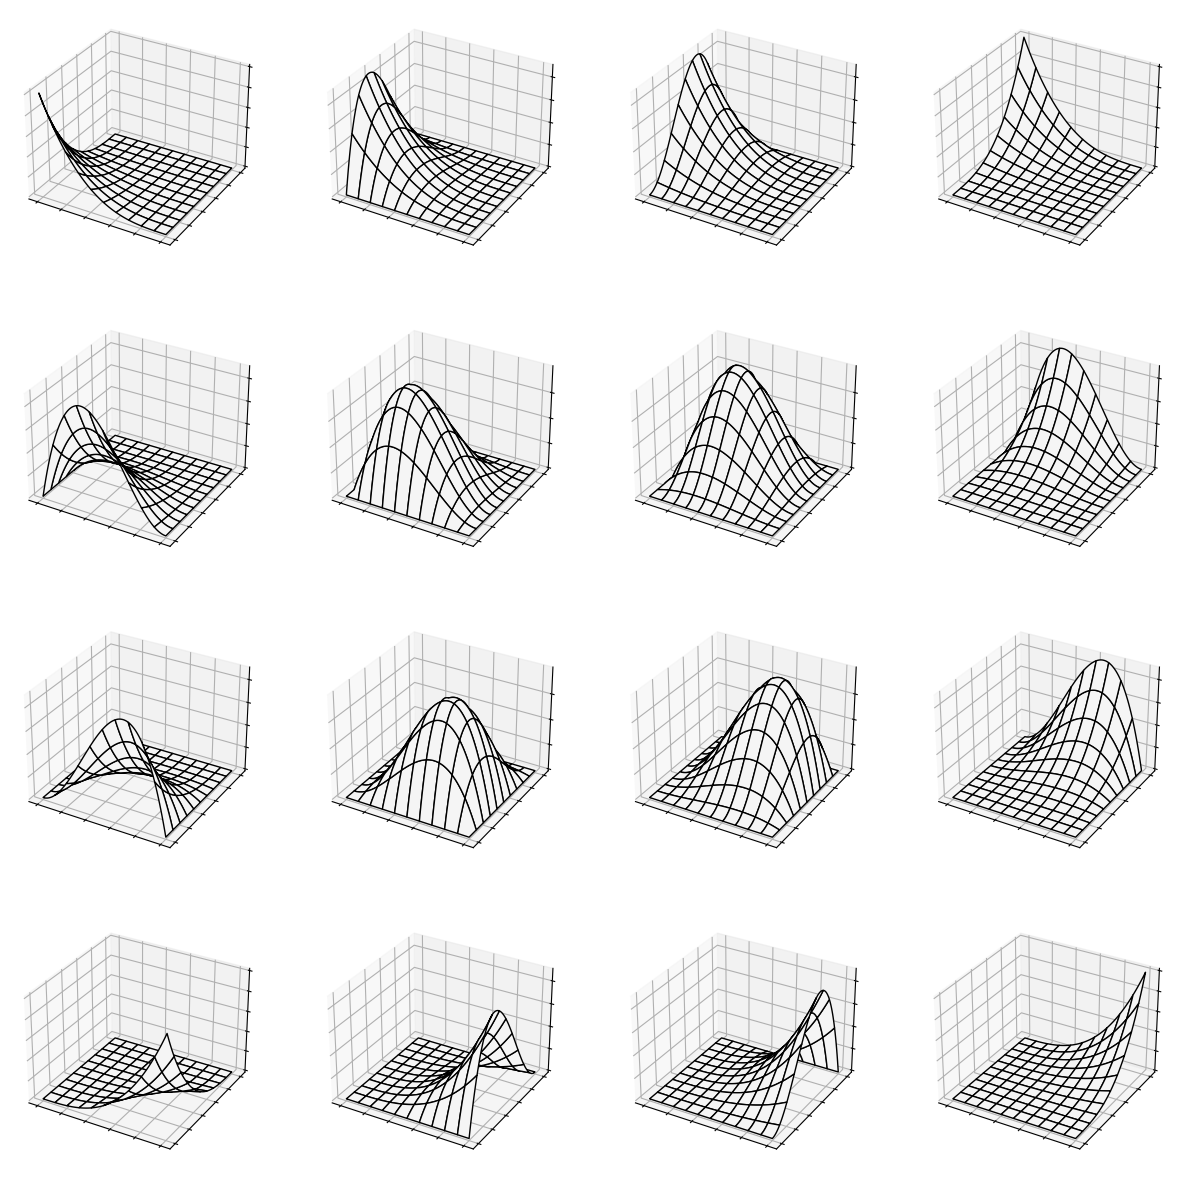

In [144]:
n = 3
u = np.linspace (0, 1, 100)
v = np.linspace (0, 1, 100)
uu, vv = np.meshgrid (u, v)
pl.figure (figsize = (15, 15))
for i in range (n + 1):
    for k in range (n + 1):
        ww = Bezier (n, i, uu) * Bezier (n, k, vv)
        ax = pl.subplot (n + 1, n + 1, i * (n + 1) + k + 1, projection = '3d')
        ax.plot_surface (uu, vv, ww, shade = False, rstride = 10, cstride = 10, color = 'whitesmoke', edgecolor = 'black')
        ax.xaxis.set_ticklabels ([])
        ax.yaxis.set_ticklabels ([])
        ax.zaxis.set_ticklabels ([])

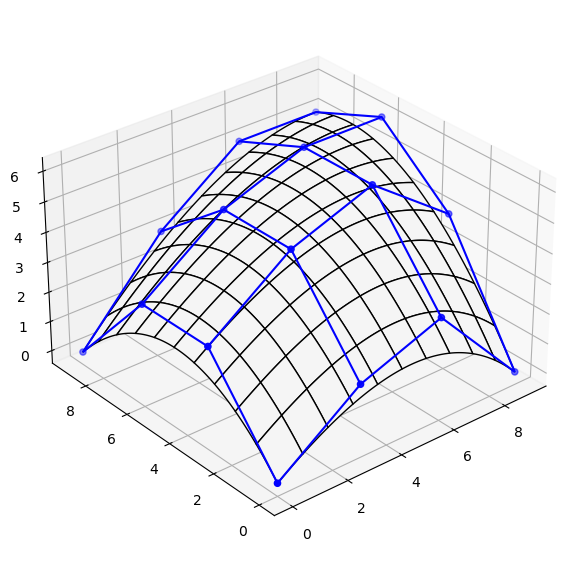

In [145]:
n = 3

u = np.linspace (0, 1, 100)
v = np.linspace (0, 1, 100)
uu, vv = np.meshgrid (u, v)

rows, cols = uu.shape
xx = np.zeros_like (uu)
yy = np.zeros_like (uu)
zz = np.zeros_like (uu)
for i in range (n + 1):
    for k in range (n + 1):
        p = P [:, i, k] .reshape ((3, 1))
        ww = Bezier (n, i, uu) * Bezier (n, k, vv)
        xx += ww * p [0]
        yy += ww * p [1]
        zz += ww * p [2]

pl.figure (figsize = (7, 10))
ax = pl.subplot (projection = '3d', azim = -130, elev = 30)
ax.plot_surface (xx, yy, zz, shade = False, rstride = 10, cstride = 10, color = 'whitesmoke', edgecolor = 'black')
ax.plot_wireframe (P [0], P [1], P [2], edgecolor = 'blue')
ax.scatter (P [0], P [1], P [2], 'o', color = 'blue')
ax.set_box_aspect ((np.ptp (P [0]), np.ptp (P [1]), np.ptp (P [2])))

## Folie 21

In [146]:
P = np.array ([
    [2, 1, 4, 3,   2, 1, 4, 3,   2, 1, 4, 3,   2, 1, 4, 3],
    [2, 1, 1, 2,   2, 1, 1, 2,   3, 4, 4, 3,   3, 4, 4, 3],
    [0, 1, 1, 0,   1, 2, 2, 1,   1, 2, 2, 1,   0, 1, 1, 0]
]) .reshape (3, 4, 4, order = 'F')

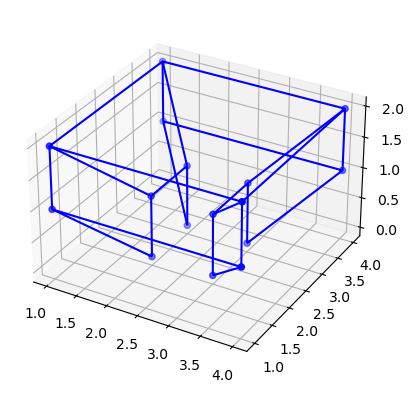

In [147]:
ax = pl.subplot (projection = '3d')
ax.plot_wireframe (P [0], P [1], P [2], edgecolor = 'blue')
ax.scatter (P [0], P [1], P [2], 'o', color = 'blue')
ax.set_box_aspect ((np.ptp (P [0]), np.ptp (P [1]), np.ptp (P [2])))

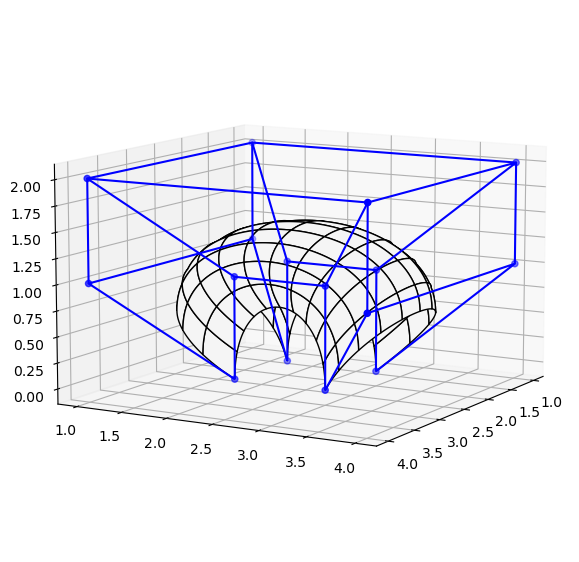

In [148]:
n = 3

rows, cols = uu.shape
xx = np.zeros_like (uu)
yy = np.zeros_like (uu)
zz = np.zeros_like (uu)
for i in range (n + 1):
    for k in range (n + 1):
        p = P [:, i, k] .reshape ((3, 1))
        ww = Bezier (n, i, uu) * Bezier (n, k, vv)
        xx += ww * p [0]
        yy += ww * p [1]
        zz += ww * p [2]

pl.figure (figsize = (7, 10))
ax = pl.subplot (projection = '3d')
ax.plot_surface (xx, yy, zz, shade = False, rstride = 10, cstride = 10, color = 'whitesmoke', edgecolor = 'black')
ax.plot_wireframe (P [0], P [1], P [2], edgecolor = 'blue')
ax.scatter (P [0], P [1], P [2], 'o', color = 'blue')
ax.set_box_aspect ((np.ptp (P [0]), np.ptp (P [1]), np.ptp (P [2])))
ax.view_init (elev = 10, azim = 30)

## Folie 23

In [149]:
P = np.array ([
    [0, 1, 2, 3, 4, 5,   0, 1, 2, 3, 4, 5,   0,   1,  2,   3,  4, 5,   0, 1, 2, 3, 4, 5],
    [0, 0, 0, 0, 0, 0,   2, 2, 2, 2, 2, 2,   4,   4,  4,   4,  4, 4,   6, 6, 6, 6, 6, 6],
    [0, 0, 0, 0, 0, 0,   0, 1, 1, 3, 1, 0,   0, -10, 10, -10, 10, 0,   0, 0, 0, 0, 0, 0]
]) .reshape (3, 6, 4, order = 'F')

In [150]:
tu = [0, 0, 0, 0, 1, 2, 3, 3, 3, 3 + 1E-8]
tv = [0, 0, 0, 0, 1, 1, 1, 1 + 1E-8]

In [151]:
def N (i, k, t, tt):
    if (k == 0):
        return 0 + ((tt >= t [i]) & (tt < t [i + 1]))
    
    d = t [i + k] - t [i]
    f = 0 if (d == 0) else (tt - t [i]) / d
        
    d = t [i + k + 1] - t [i + 1]
    g = 0 if (d == 0) else (t [i + k + 1] - tt) / d
        
    return f * N (i, k - 1, t, tt) + g * N (i + 1, k - 1, t, tt) 

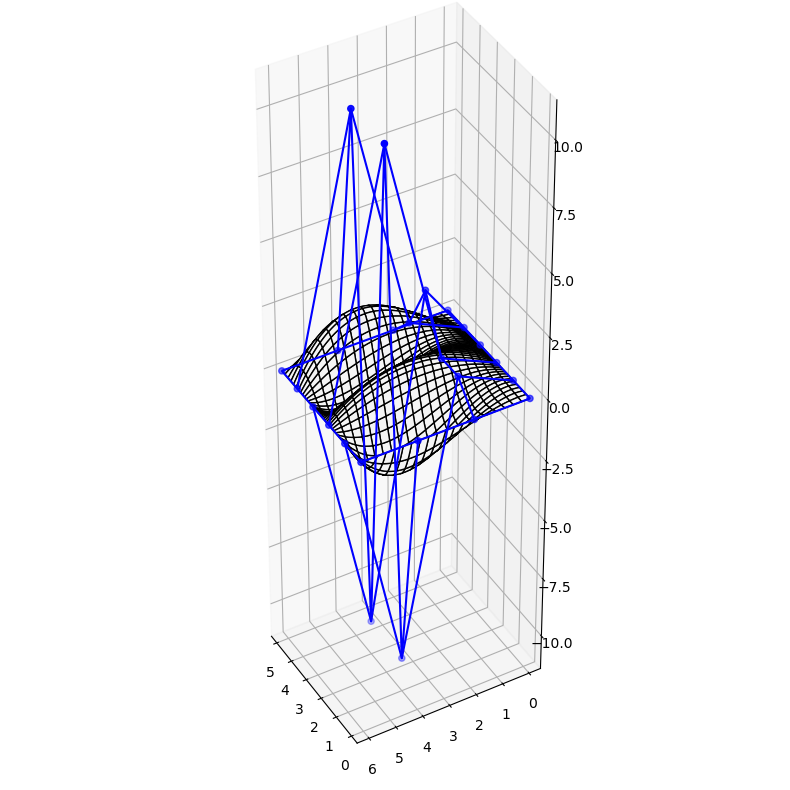

In [152]:
m = 6
n = 4

mm = 400; uu = np.linspace (0, 3, mm, endpoint = True)
nn = 200; vv = np.linspace (0, 1, nn, endpoint = True)

xx = np.zeros ((mm, nn))
yy = np.zeros ((mm, nn))
zz = np.zeros ((mm, nn))
for i in range (m):
    for k in range (n):
        p = P [:, i, k] .reshape ((3, 1))
        a = np.array ([N (i, 3, tu, uu)])
        b = np.array ([N (k, 3, tv, vv)])
        ww = a.T @ b
        xx += ww * p [0]
        yy += ww * p [1]
        zz += ww * p [2]

pl.figure (figsize = (10, 10))
ax = pl.subplot (projection = '3d')
ax.plot_surface (xx, yy, zz, shade = False, rstride = 10, cstride = 10, color = 'whitesmoke', edgecolor = 'black')
ax.set_box_aspect ((np.ptp (xx), np.ptp (yy), np.ptp (zz)))
ax.plot_wireframe (P [0], P [1], P [2], edgecolor = 'blue')
ax.scatter (P [0], P [1], P [2], 'o', color = 'blue')
ax.set_box_aspect ((np.ptp (P [0]), np.ptp (P [1]), np.ptp (P [2])))
ax.view_init (elev = 40, azim = 150)

## Folie 24

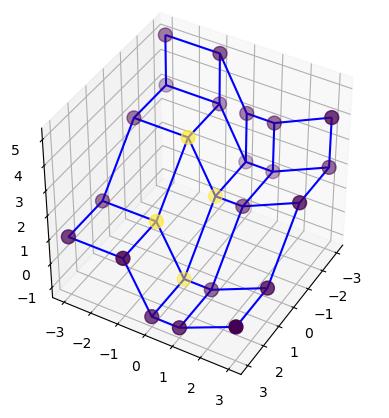

In [153]:
P = np.array ([
    [ 3,  3,  3,  3,  3,    1,  1,  1,  1,  1,   -1, -1, -1, -1, -1,   -3, -3, -3, -3, -3,   -3, -3, -3, -3, -3],
    [-3, -1,  0,  1,  3,   -3, -1,  0,  1,  3,   -3, -1,  0,  1,  3,   -3, -1,  0,  1,  3,   -3, -1,  0,  1,  3],
    [ 1,  1, -1, -1,  0,    1,  1, -1, -1,  0,    3,  3,  1,  1,  2,    3,  3,  1,  1,  2,    5,  5,  3,  3,  4]
]) .reshape (3, 5, 5, order = 'F')

w = 10

W = np.array ([
    [ 1,  1,  1,  1,  1,    1,  w,  w,  1,  1,    1,  w,  w,  1,  1,    1,  1,  1,  1,  1,    1,  1,  1,  1,  1]
]) .reshape (5, 5, order = 'F')

ax = pl.subplot (projection = '3d')
ax.plot_wireframe (P [0], P [1], P [2], edgecolor = 'blue')
ax.scatter (P [0], P [1], P [2], s = 100, c = W)
ax.set_box_aspect ((np.ptp (P [0]), np.ptp (P [1]), np.ptp (P [2])))
ax.view_init (elev = 40, azim = 30)

In [154]:
t = [0, 0, 0, 1/3., 2/3., 1, 1, 1 + 1E-8]

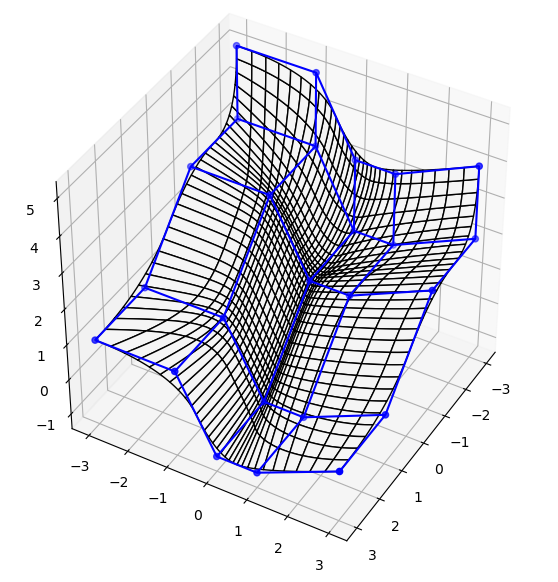

In [155]:
m = 5
n = 5

nn = 300
uv = np.linspace (0, 1, nn)

ww = np.zeros ((nn, nn))
xx = np.zeros ((nn, nn))
yy = np.zeros ((nn, nn))
zz = np.zeros ((nn, nn))
for i in range (m):
    for k in range (n):
        p = P [:, i, k] .reshape ((3, 1))
        w = W [i, k]
        a = np.array ([N (i, 2, t, uv)])
        b = np.array ([N (k, 2, t, uv)])
        atb = w * a.T @ b
        ww += atb
        xx += atb * p [0]
        yy += atb * p [1]
        zz += atb * p [2]
xx /= ww
yy /= ww
zz /= ww

pl.figure (figsize = (7, 7))
ax = pl.subplot (projection = '3d')
ax.plot_surface (xx, yy, zz, shade = False, rstride = 10, cstride = 10, color = 'whitesmoke', edgecolor = 'black')
ax.set_box_aspect ((np.ptp (xx), np.ptp (yy), np.ptp (zz)))
ax.plot_wireframe (P [0], P [1], P [2], edgecolor = 'blue')
ax.scatter (P [0], P [1], P [2], 'o', color = 'blue')
#ax.set_box_aspect ((np.ptp (P [0]), np.ptp (P [1]), np.ptp (P [2])))
ax.view_init (elev = 40, azim = 30)